In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

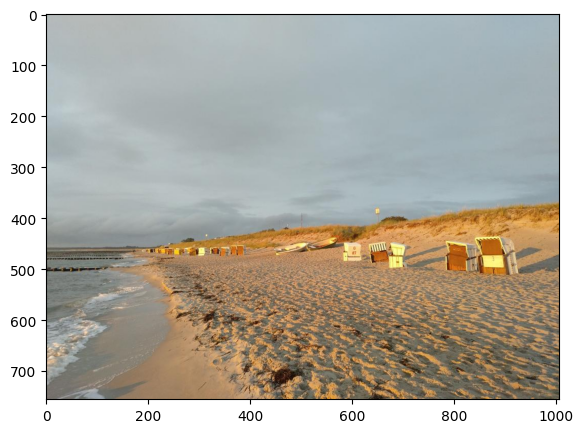

In [14]:
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

White patch

(<Axes: >, <matplotlib.image.AxesImage at 0x1298560c0>)

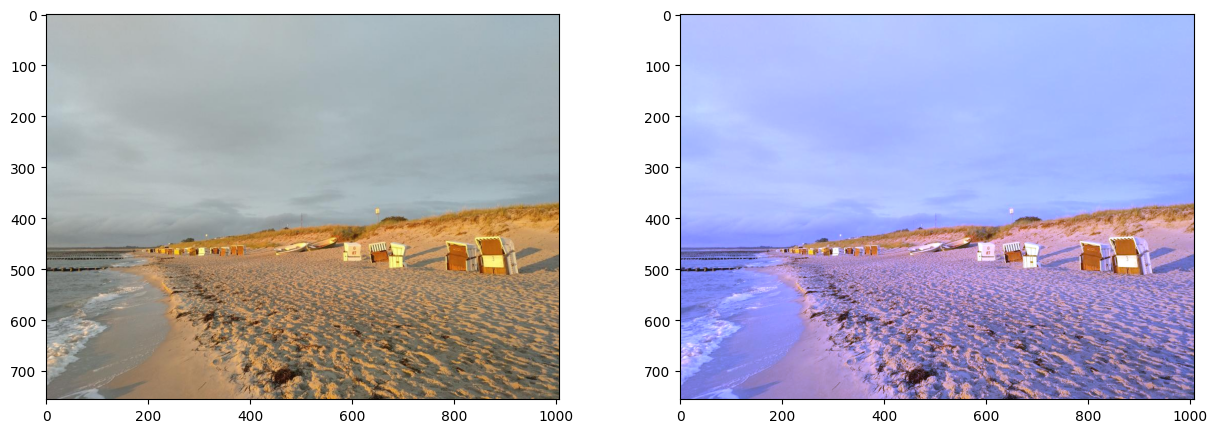

In [6]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

Gray world

(<Axes: >, <matplotlib.image.AxesImage at 0x12b463e60>)

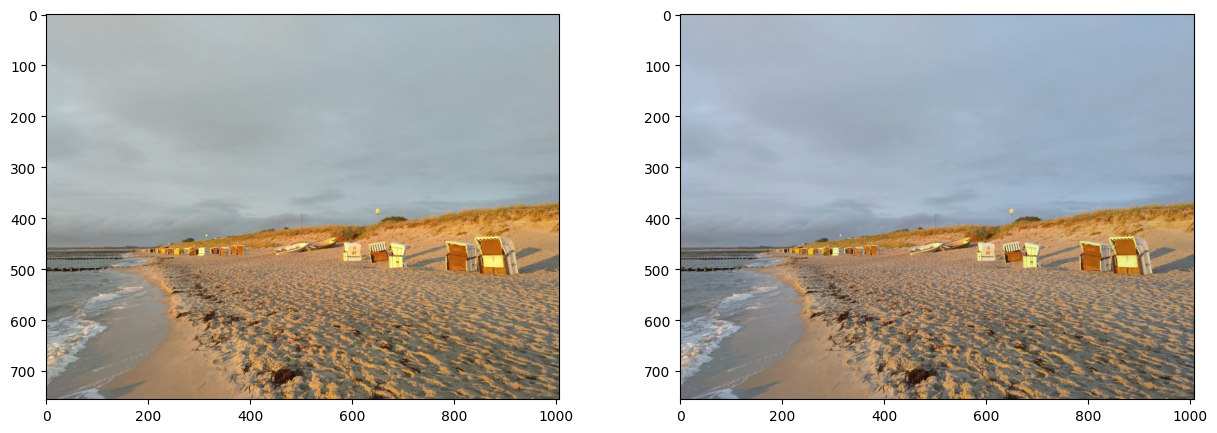

In [74]:
# Load your image
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:,:,0])
mean_g = np.mean(img[:,:,1])
mean_b = np.mean(img[:,:,2])
#print("Середнє R:", mean_r)
#print("Середнє G:", mean_g)
#print("Середнє B:", mean_b)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
mean_m = (mean_r + mean_g + mean_b) / 3
#print("Середнє M:", mean_m)

kr = mean_m / mean_r
kg = mean_m / mean_g
kb = mean_m / mean_b

#print("kr:", kr)
#print("kg:", kg)
#print("kb:", kb)

# Apply color balancing and generate the balanced image
balanced[:, :, 0] = img[:, :, 0] * kr
balanced[:, :, 1] = img[:, :, 1] * kg
balanced[:, :, 2] = img[:, :, 2] * kb

balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

Scale-by-max


max_r: 255
max_g: 255
max_b: 237


(<Axes: >, <matplotlib.image.AxesImage at 0x12b5d1eb0>)

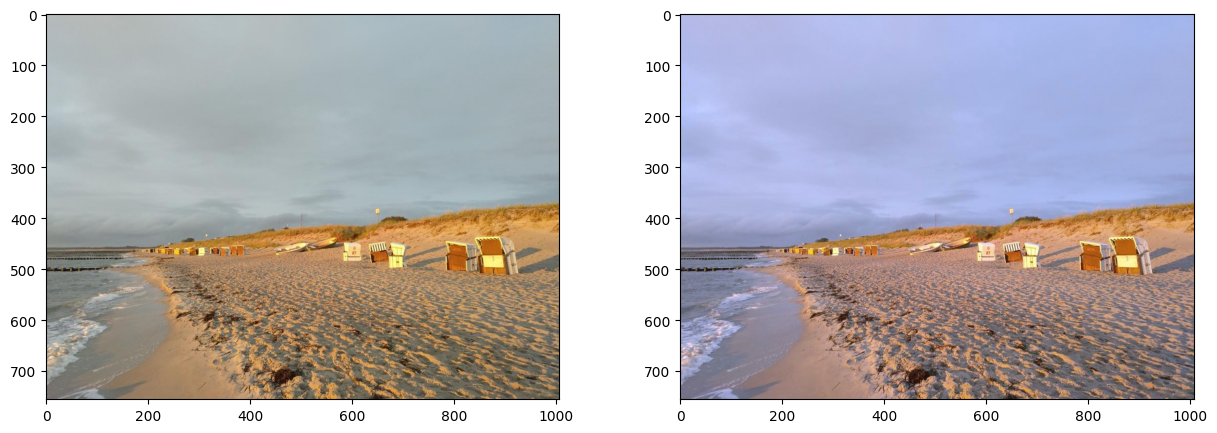

In [72]:
# Load your image
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:,:,0])
max_g = np.max(img[:,:,1])
max_b = np.max(img[:,:,2])

kr = 255 / max_r
kg = 255 / max_g
kb = 255 / max_b

# Apply scale-by-max balancing and generate the balanced image
scale_by_max[:, :, 0] *= kr
scale_by_max[:, :, 1] *= kg
scale_by_max[:, :, 2] *= kb

balanced_img = np.clip(scale_by_max, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_img)